In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from scipy.sparse import coo_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
def jaccard(x1, x2):
    """
    Given two numpy arrays, returns a similarity between 0 and 1. (Float)
    """
    x1 = x1.astype(np.int8)
    x2 = x2.astype(np.int8)
    intersection = (x1 & x2).sum()
    union = (x1 | x2).sum()
    similarity = intersection/union
    return similarity

In [3]:
purchase_data = pd.read_parquet("../dat/steam_purchase.parquet")

In [24]:
user_encoder = OrdinalEncoder(dtype=np.int64)
game_encoder = OrdinalEncoder(dtype=np.int64)

cleaned_set = purchase_data.set_index("game")[purchase_data.groupby("game").count().userId >= 20].reset_index()
cleaned_set["row"] = user_encoder.fit_transform(np.array(cleaned_set.userId)[:, np.newaxis])
cleaned_set["column"] = game_encoder.fit_transform(np.array(cleaned_set.game)[:, np.newaxis])

rating_matrix = coo_matrix((np.ones(shape=(len(cleaned_set),)), (np.array(cleaned_set.row), np.array(cleaned_set.column))),
           shape=((cleaned_set.row.max() + 1, cleaned_set.column.max() + 1)),
           dtype=np.int8).toarray()

/tmp/ipykernel_7312/1175058226.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_set = purchase_data.set_index("game")[purchase_data.groupby("game").count().userId >= 20].reset_index()


In [26]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(rating_matrix)

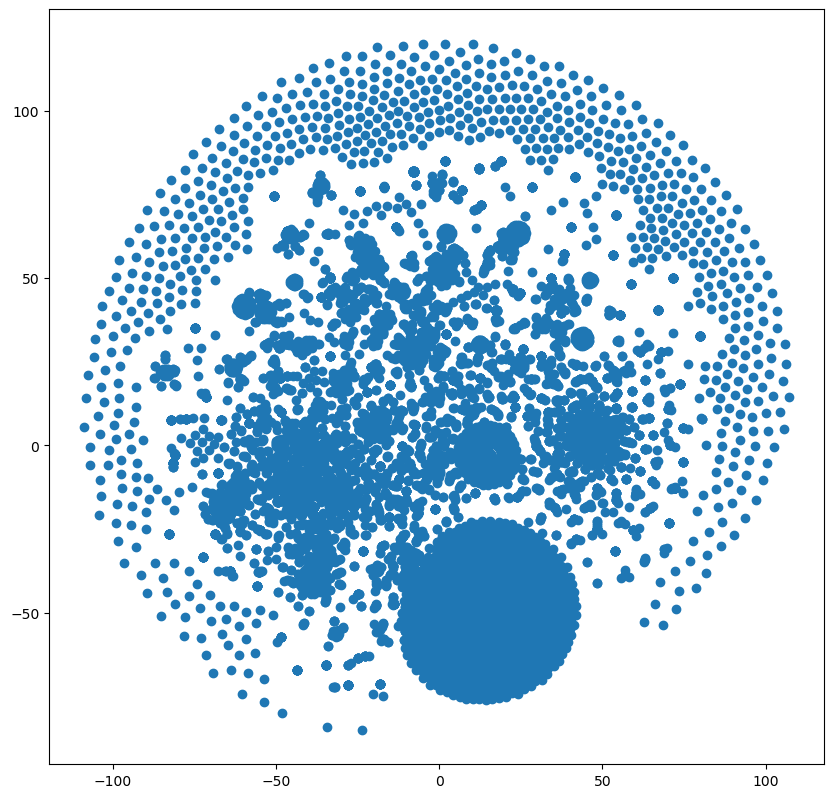

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
ax.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

We got a very surprised face.

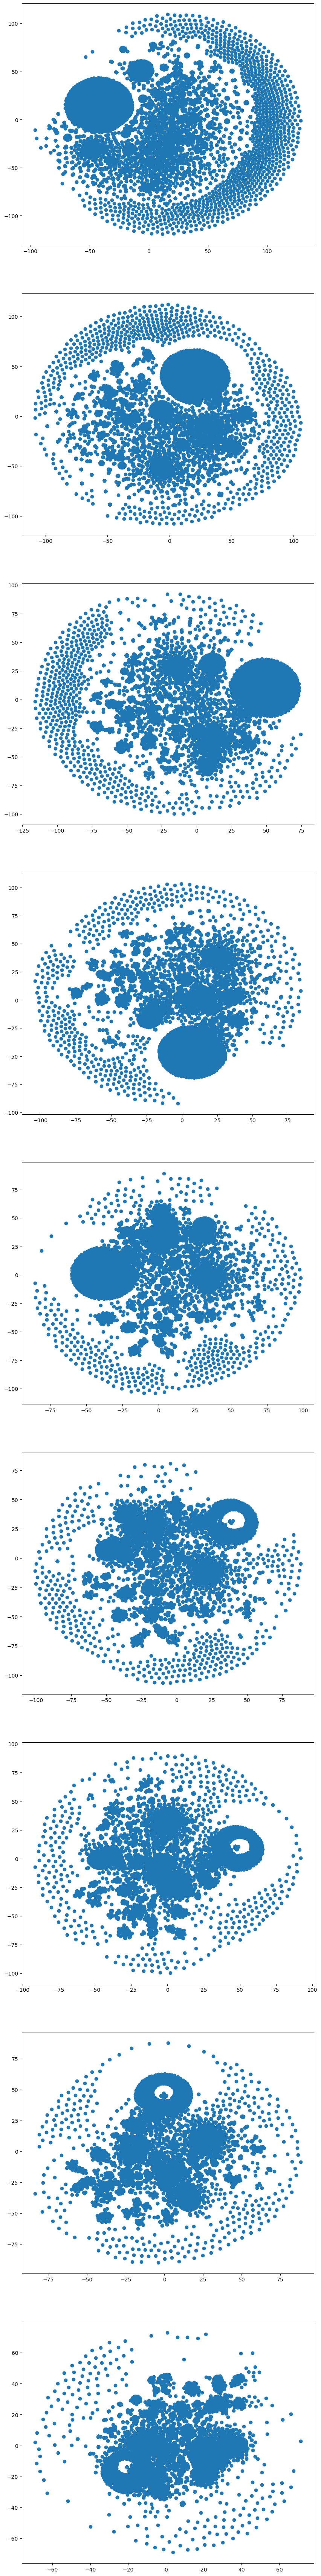

In [29]:
perplexity_values = [5, 10, 15, 20, 25, 30, 40, 50, 100]

fig, ax = plt.subplots(len(perplexity_values), 1, figsize=(10, 10 * len(perplexity_values)), dpi=100)

for i, perp in enumerate(perplexity_values):
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perp).fit_transform(rating_matrix)
    ax[i].scatter(X_embedded[:, 0], X_embedded[:, 1])

plt.show()

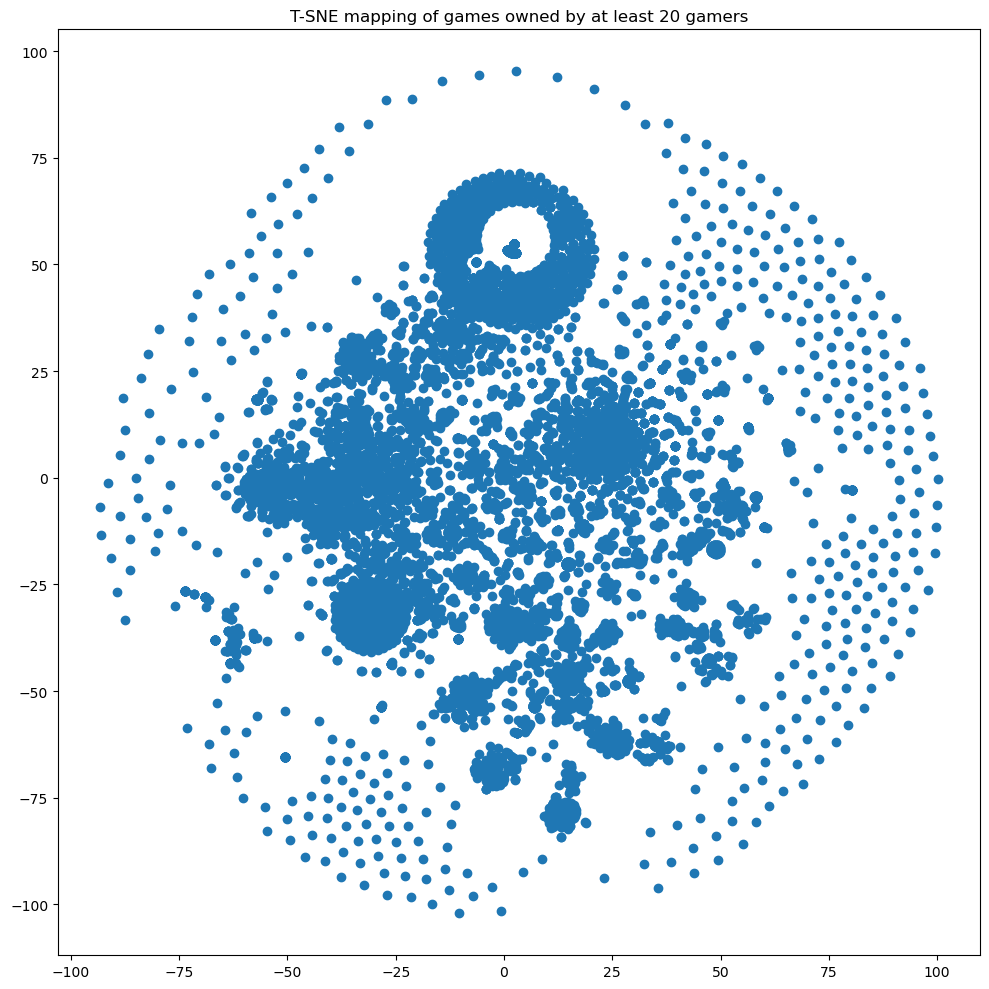

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(rating_matrix)
ax.scatter(X_embedded[:, 0], X_embedded[:, 1])

ax.set_title("T-SNE mapping of games owned by at least 20 gamers")
fig.tight_layout()
plt.show()

Now, the next step is to figure out if this graph makes any sense, in terms of game genres. For this, I need to write a script to automatically pull the game genre from Twitch database using IGDB API. Then, I will colorize the instances on the graph, see if it looks nicer.

To be continued.